In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

# Define the URL for the SEC EDGAR search page
url = "https://www.sec.gov/files/company_tickers_exchange.json"

headers = {
   "User-Agent": "your.email@email.com"
}
# Fetch the HTML content of the search page
response = requests.get(url,headers=headers)
html_content = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

json_url = f"https://data.sec.gov/api/xbrl/companyconcept/CIK0001652044/us-gaap/AccountsPayableCurrent.json"
json_response = requests.get(json_url,headers=headers)
json_content = json_response.json()
print(json_content)
print(soup.prettify())

{'cik': 1652044, 'taxonomy': 'us-gaap', 'tag': 'AccountsPayableCurrent', 'label': 'Accounts Payable, Current', 'description': "Carrying value as of the balance sheet date of liabilities incurred (and for which invoices have typically been received) and payable to vendors for goods and services received that are used in an entity's business. Used to reflect the current portion of the liabilities (due within one year or within the normal operating cycle if longer).", 'entityName': 'Alphabet Inc.', 'units': {'USD': [{'end': '2014-12-31', 'val': 1715000000, 'accn': '0001652044-15-000005', 'fy': 2015, 'fp': 'Q3', 'form': '10-Q', 'filed': '2015-10-29'}, {'end': '2014-12-31', 'val': 1715000000, 'accn': '0001652044-16-000012', 'fy': 2015, 'fp': 'FY', 'form': '10-K', 'filed': '2016-02-11'}, {'end': '2014-12-31', 'val': 1715000000, 'accn': '0001652044-16-000022', 'fy': 2015, 'fp': 'FY', 'form': '8-K', 'filed': '2016-05-03', 'frame': 'CY2014Q4I'}, {'end': '2015-09-30', 'val': 1549000000, 'accn': 

In [2]:


# Parse the JSON content from the BeautifulSoup object
json_data = json.loads(soup.text)

# Convert the JSON data into a pandas DataFrame
df_cik_lookup = pd.DataFrame(json_data['data'], columns=json_data['fields'])


# df_cik_lookup['cik']=df_cik_lookup['cik'].astype(str).zfill(10)
df_cik_lookup

cik                                name ticker exchange
0       320193                          Apple Inc.   AAPL   Nasdaq
1      1045810                         NVIDIA CORP   NVDA   Nasdaq
2       789019                      MICROSOFT CORP   MSFT   Nasdaq
3      1652044                       Alphabet Inc.  GOOGL   Nasdaq
4      1018724                      AMAZON COM INC   AMZN   Nasdaq
...        ...                                 ...    ...      ...
10190  2024203             Cayson Acquisition Corp  CAPNU   Nasdaq
10191  2025065       Black Spade Acquisition II Co  BSIIU   Nasdaq
10192  2025065       Black Spade Acquisition II Co  BSIIW   Nasdaq
10193  2025341       Andretti Acquisition Corp. II  POLEU   Nasdaq
10194  2025396  Vine Hill Capital Investment Corp.  VCICU   Nasdaq

[10195 rows x 4 columns]

In [3]:
json_data_list = []

# Define headers for the request
headers = {
    'User-Agent': 'Your Name (your_email@example.com)',
    'Accept-Encoding': 'gzip, deflate',
    'Host': 'data.sec.gov'
}

# Loop through the first 100 CIKs
for i in range(100):
    cik = df_cik_lookup['cik'][i]
    cik=str(cik).zfill(10)
    print(cik)
    json_url = f"https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}/us-gaap/AccountsPayableCurrent.json"
    json_response = requests.get(json_url, headers=headers)
    
    # Check if the request was successful
    if json_response.status_code == 200:
        json_content = json_response.json()
        json_data_list.append(json_content)
    else:
        print(f"Failed to fetch data for CIK: {cik}")

# Convert the list of JSON content into a DataFrame
df_json_content = pd.DataFrame(json_data_list)
df_json_content.to_csv('data.csv', index=False)


0000320193
0001045810
0000789019
0001652044
0001018724
0001326801
0001067983
Failed to fetch data for CIK: 0001067983
0001046179
Failed to fetch data for CIK: 0001046179
0001730168
0000059478
0001318605
0000104169
0000019617
Failed to fetch data for CIK: 0000019617
0000313838
0000034088
Failed to fetch data for CIK: 0000034088
0000731766
Failed to fetch data for CIK: 0000731766
0001403161
0000884394
Failed to fetch data for CIK: 0000884394
0000353278
Failed to fetch data for CIK: 0000353278
0001341439
0001141391
0000354950
0000080424
0000909832
0000200406
0001551152
0000937966
0000070858
Failed to fetch data for CIK: 0000070858
0001065280
0000021344
Failed to fetch data for CIK: 0000021344
0000002488
0001108524
0000310158
0000093410
0001000184
Failed to fetch data for CIK: 0001000184
0001577552
Failed to fetch data for CIK: 0001577552
0001283699
Failed to fetch data for CIK: 0001283699
0000901832
Failed to fetch data for CIK: 0000901832
0000077476
0001094517
0001114448
Failed to fetch 

In [5]:
df_json_content

cik taxonomy                     tag                      label  \
0    320193  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
1   1045810  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
2    789019  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
3   1652044  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
4   1018724  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
..      ...      ...                     ...                        ...   
57   773840  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
58  1551182  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
59  1163165  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
60   109198  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
61  1596532  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   

                                          description  \
0   Carrying value as of the balance sheet date of...   
1   Carrying value as of the balance sheet date of...   
2   Carrying value as of the balance sheet date of...   
3   Carrying value as of the balance sheet date of...   
4   Carrying value as of the balance sheet date of...   
..                                                ...   
57  Carrying value as of the balance sheet date of...   
58  Carrying value as of the balance sheet date of...   
59  Carrying value as of the balance sheet date of...   
60  Carrying value as of the balance sheet date of...   
61  Carrying value as of the balance sheet date of...   

                     entityName  \
0                    Apple Inc.   
1                   NVIDIA CORP   
2         MICROSOFT CORPORATION   
3                 Alphabet Inc.   
4              AMAZON.COM, INC.   
..                          ...   
57  Honeywell International Inc   
58        EATON CORPORATION plc   
59               ConocoPhillips   
60      The TJX Companies, Inc.   
61        Arista Networks, Inc.   

                                                units  
0   {'USD': [{'end': '2008-09-27', 'val': 55200000...  
1   {'USD': [{'end': '2009-01-25', 'val': 21886400...  
2   {'USD': [{'end': '2009-06-30', 'val': 33240000...  
3   {'USD': [{'end': '2014-12-31', 'val': 17150000...  
4   {'USD': [{'end': '2008-12-31', 'val': 35940000...  
..                                                ...  
57  {'USD': [{'end': '2008-12-31', 'val': 37730000...  
58  {'USD': [{'end': '2011-12-31', 'val': 14910000...  
59  {'USD': [{'end': '2009-12-31', 'val': 15485000...  
60  {'USD': [{'end': '2008-07-26', 'val': 17460790...  
61  {'USD': [{'end': '2013-12-31', 'val': 14741000...  

[62 rows x 7 columns]

In [6]:
df_units=pd.json_normalize(df_json_content['units'])

In [7]:
df_units

USD  JPY  EUR  CNY
0   [{'end': '2008-09-27', 'val': 5520000000, 'acc...  NaN  NaN  NaN
1   [{'end': '2009-01-25', 'val': 218864000, 'accn...  NaN  NaN  NaN
2   [{'end': '2009-06-30', 'val': 3324000000, 'acc...  NaN  NaN  NaN
3   [{'end': '2014-12-31', 'val': 1715000000, 'acc...  NaN  NaN  NaN
4   [{'end': '2008-12-31', 'val': 3594000000, 'acc...  NaN  NaN  NaN
..                                                ...  ...  ...  ...
57  [{'end': '2008-12-31', 'val': 3773000000, 'acc...  NaN  NaN  NaN
58  [{'end': '2011-12-31', 'val': 1491000000, 'acc...  NaN  NaN  NaN
59  [{'end': '2009-12-31', 'val': 15485000000, 'ac...  NaN  NaN  NaN
60  [{'end': '2008-07-26', 'val': 1746079000, 'acc...  NaN  NaN  NaN
61  [{'end': '2013-12-31', 'val': 14741000, 'accn'...  NaN  NaN  NaN

[62 rows x 4 columns]

In [8]:
# Define a function to extract the 'val' field from the JSON data
def extract_val(json_data):
    normalized_data = pd.json_normalize(json_data)
    filtered_data = normalized_data[normalized_data['form'] == '10-K']
    return filtered_data['val'].tolist()

def extract_filled(json_data):
    normalized_data = pd.json_normalize(json_data)
    filtered_data = normalized_data[normalized_data['form'] == '10-K']
    return filtered_data['end'].tolist()

# Apply the function to the 'USD' column and create a new column 'value'
df_json_content['value'] = df_units['USD'].apply(lambda x: extract_val(x) if isinstance(x, list) else [])
df_json_content['dates_filed'] = df_units['USD'].apply(lambda x: extract_filled(x) if isinstance(x, list) else [])

# Display the updated DataFrame
df_json_content


cik taxonomy                     tag                      label  \
0    320193  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
1   1045810  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
2    789019  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
3   1652044  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
4   1018724  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
..      ...      ...                     ...                        ...   
57   773840  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
58  1551182  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
59  1163165  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
60   109198  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   
61  1596532  us-gaap  AccountsPayableCurrent  Accounts Payable, Current   

                                          description  \
0   Carrying value as of the balance sheet date of...   
1   Carrying value as of the balance sheet date of...   
2   Carrying value as of the balance sheet date of...   
3   Carrying value as of the balance sheet date of...   
4   Carrying value as of the balance sheet date of...   
..                                                ...   
57  Carrying value as of the balance sheet date of...   
58  Carrying value as of the balance sheet date of...   
59  Carrying value as of the balance sheet date of...   
60  Carrying value as of the balance sheet date of...   
61  Carrying value as of the balance sheet date of...   

                     entityName  \
0                    Apple Inc.   
1                   NVIDIA CORP   
2         MICROSOFT CORPORATION   
3                 Alphabet Inc.   
4              AMAZON.COM, INC.   
..                          ...   
57  Honeywell International Inc   
58        EATON CORPORATION plc   
59               ConocoPhillips   
60      The TJX Companies, Inc.   
61        Arista Networks, Inc.   

                                                units  \
0   {'USD': [{'end': '2008-09-27', 'val': 55200000...   
1   {'USD': [{'end': '2009-01-25', 'val': 21886400...   
2   {'USD': [{'end': '2009-06-30', 'val': 33240000...   
3   {'USD': [{'end': '2014-12-31', 'val': 17150000...   
4   {'USD': [{'end': '2008-12-31', 'val': 35940000...   
..                                                ...   
57  {'USD': [{'end': '2008-12-31', 'val': 37730000...   
58  {'USD': [{'end': '2011-12-31', 'val': 14910000...   
59  {'USD': [{'end': '2009-12-31', 'val': 15485000...   
60  {'USD': [{'end': '2008-07-26', 'val': 17460790...   
61  {'USD': [{'end': '2013-12-31', 'val': 14741000...   

                                                value  \
0   [5520000000, 5601000000, 5601000000, 120150000...   
1   [218864000, 344527000, 344527000, 286138000, 2...   
2   [3324000000, 4025000000, 4025000000, 419700000...   
3   [1715000000, 1931000000, 1931000000, 204100000...   
4   [3594000000, 5605000000, 5605000000, 805100000...   
..                                                ...   
57  [3773000000, 3633000000, 3633000000, 434400000...   
58  [1491000000, 1879000000, 1879000000, 196000000...   
59  [15485000000, 18399000000, 18399000000, 196530...   
60  [1276098000, 1507892000, 1507892000, 168392900...   
61  [20111000, 32428000, 32428000, 43966000, 43966...   

                                          dates_filed  
0   [2008-09-27, 2009-09-26, 2009-09-26, 2010-09-2...  
1   [2009-01-25, 2010-01-31, 2010-01-31, 2011-01-3...  
2   [2009-06-30, 2010-06-30, 2010-06-30, 2011-06-3...  
3   [2014-12-31, 2015-12-31, 2015-12-31, 2016-12-3...  
4   [2008-12-31, 2009-12-31, 2009-12-31, 2010-12-3...  
..                                                ...  
57  [2008-12-31, 2009-12-31, 2009-12-31, 2010-12-3...  
58  [2011-12-31, 2012-12-31, 2012-12-31, 2013-12-3...  
59  [2009-12-31, 2010-12-31, 2010-12-31, 2011-12-3...  
60  [2009-01-31, 2010-01-30, 2010-01-30, 2011-01-2...  
61  [2013-12-31

In [ ]:

import matplotlib.pyplot as plt

# Plot graphs of value for the first 5 companies
for i in range(5):
    company_name = df_json_content['entityName'][i]
    values = df_json_content['value'][i]
    time = df_json_content['dates_filed'][i]
    
    plt.figure(figsize=(10, 5))
    plt.plot(time, values, marker='o')
    plt.title(f'Value Over Time for {company_name}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.ylim(min(values) * 0.9, max(values) * 1.1)  # Set y-axis limits with some padding
    plt.grid(True)
    plt.show()

In [10]:
json_data_list = []

# Define headers for the request
headers = {
    'User-Agent': 'Your Name (your_email@example.com)',
    'Accept-Encoding': 'gzip, deflate',
    'Host': 'data.sec.gov'
}

# Loop through the first 100 CIKs
for i in range(100):
    cik = df_cik_lookup['cik'][i]
    cik=str(cik).zfill(10)
    print(cik)
    json_url = f"https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json"
    json_response = requests.get(json_url, headers=headers)
    
    # Check if the request was successful
    if json_response.status_code == 200:
        json_content = json_response.json()
        json_data_list.append(json_content)
    else:
        print(f"Failed to fetch data for CIK: {cik}")

# Convert the list of JSON content into a DataFrame
df_json_companyfacts = pd.DataFrame(json_data_list)
df_json_companyfacts.to_csv('data2.csv', index=False)

0000320193
0001045810
0000789019
0001652044
0001018724
0001326801
0001067983
0001046179
0001730168
0000059478
0001318605
0000104169
0000019617
0000313838
0000034088
0000731766
0001403161
0000884394
Failed to fetch data for CIK: 0000884394
0000353278
0001341439
0001141391
0000354950
0000080424
0000909832
0000200406
0001551152
0000937966
0000070858
0001065280
0000021344
0000002488
0001108524
0000310158
0000093410
0001000184
0001577552
0001283699
0000901832
0000077476
0001094517
0001114448
0000097745
0001467373
0001707925
0000796343
0000063908
0000051143
0001306965
0000858877
0000040545
0001737806
0000001800
0000072971
0000313616
0001067839
Failed to fetch data for CIK: 0001067839
0000004962
0001373715
0000018230
0000732712
0000804328
0000097476
0001413329
0001393818
0001061736
0000895421
0001000275
0000318154
0000896878
0001035267
0001744489
0000753308
0000078003
0000006951
0000101829
0000064040
0001089113
0001543151
0001166691
0000217410
0000886982
0000732717
0000879764
0000060667
00011

In [11]:
df_json_companyfacts

cik                  entityName  \
0    320193                  Apple Inc.   
1   1045810                 NVIDIA CORP   
2    789019       MICROSOFT CORPORATION   
3   1652044               Alphabet Inc.   
4   1018724            AMAZON.COM, INC.   
..      ...                         ...   
91   310764                STRYKER CORP   
92  1668717  Anheuser-Busch InBev SA/NV   
93  1163165              ConocoPhillips   
94   109198     The TJX Companies, Inc.   
95  1596532       Arista Networks, Inc.   

                                                facts  
0   {'dei': {'EntityCommonStockSharesOutstanding':...  
1   {'dei': {'EntityCommonStockSharesOutstanding':...  
2   {'dei': {'EntityCommonStockSharesOutstanding':...  
3   {'dei': {'EntityPublicFloat': {'label': 'Entit...  
4   {'dei': {'EntityCommonStockSharesOutstanding':...  
..                                                ...  
91  {'dei': {'EntityCommonStockSharesOutstanding':...  
92  {'dei': {'EntityCommonStockSharesOutstanding':...  
93  {'dei': {'EntityCommonStockSharesOutstanding':...  
94  {'dei': {'EntityCommonStockSharesOutstanding':...  
95  {'dei': {'EntityCommonStockSharesOutstanding':...  

[96 rows x 3 columns]

In [12]:
df_facts=pd.json_normalize(df_json_companyfacts['facts'])

In [13]:
df_facts

dei.EntityCommonStockSharesOutstanding.label  \
0       Entity Common Stock, Shares Outstanding   
1       Entity Common Stock, Shares Outstanding   
2       Entity Common Stock, Shares Outstanding   
3                                           NaN   
4       Entity Common Stock, Shares Outstanding   
..                                          ...   
91      Entity Common Stock, Shares Outstanding   
92      Entity Common Stock, Shares Outstanding   
93      Entity Common Stock, Shares Outstanding   
94      Entity Common Stock, Shares Outstanding   
95      Entity Common Stock, Shares Outstanding   

   dei.EntityCommonStockSharesOutstanding.description  \
0   Indicate number of shares or other units outst...   
1   Indicate number of shares or other units outst...   
2   Indicate number of shares or other units outst...   
3                                                 NaN   
4   Indicate number of shares or other units outst...   
..                                                ...   
91  Indicate number of shares or other units outst...   
92  Indicate number of shares or other units outst...   
93  Indicate number of shares or other units outst...   
94  Indicate number of shares or other units outst...   
95  Indicate number of shares or other units outst...   

   dei.EntityCommonStockSharesOutstanding.units.shares  \
0   [{'end': '2009-06-27', 'val': 895816758, 'accn...    
1   [{'end': '2009-08-17', 'val': 547800000, 'accn...    
2   [{'end': '2009-10-19', 'val': 8879121378, 'acc...    
3                                                 NaN    
4   [{'end': '2009-07-17', 'val': 431807370, 'accn...    
..                                                ...    
91  [{'end': '2009-07-31', 'val': 397547322, 'accn...    
92  [{'end': '2017-12-31', 'val': 1693242156, 'acc...    
93  [{'end': '2009-06-30', 'val': 1482903059, 'acc...    
94  [{'end': '2009-08-01', 'val': 423853927, 'accn...    
95  [{'end': '2014-08-01', 'val': 64403957, 'accn'...    

   dei.EntityPublicFloat.label  \
0          Entity Public Float   
1          Entity Public Float   
2          Entity Public Float   
3          Entity Public Float   
4          Entity Public Float   
..                         ...   
91         Entity Public Float   
92                         NaN   
93         Entity Public Float   
94         Entity Public Float   
95         Entity Public Float   

                    dei.EntityPublicFloat.description  \
0   The aggregate market value of the voting and n...   
1   The aggregate market value of the voting and n...   
2   The aggregate market value of the voting and n...   
3   The aggregate market value of the voting and n...   
4   The aggregate market value of the voting and n...   
..                                                ...   
91  The aggregate market value of the voting and n...   
92                                                NaN   
93  The aggregate market value of the voting and n...   
94  The aggregate market value of the voting and n...   
95  The aggregate market value of the voting and n...   

                      dei.EntityPublicFloat.units.USD  \
0   [{'end': '2009-03-28', 'val': 94593000000, 'ac...   
1   [{'end': '2008-07-27', 'val': 6100000000, 'acc...   
2   [{'end': '2009-12-31', 'val': 235244858633, 'a...   
3   [{'end': '2015-06-30', 'val': 0, 'accn': '0001...   
4   [{'end': '2008-06-30', 'val': 23846135567, 'ac...   
..                                                ...   
91  [{'end': '2008-06-30', 'val': 18925346797, 'ac...   
92                                                NaN   
93  [{'end': '2009-06-30', 'val': 143400000000, 'a...   
94  [{'end': '2008-07-26', 'val': 13553030893, 'ac...   
95  [{'end': '2014-06-30', 'val': 1702757925, 'acc...   

               us-gaap.AccountsPayable.label  \
0   Accounts Payable (Deprecated 2009-01-31)   
1                                        NaN   
2                                        NaN   
3                                    

In [14]:
df_facts.columns

Index(['dei.EntityCommonStockSharesOutstanding.label',
       'dei.EntityCommonStockSharesOutstanding.description',
       'dei.EntityCommonStockSharesOutstanding.units.shares',
       'dei.EntityPublicFloat.label', 'dei.EntityPublicFloat.description',
       'dei.EntityPublicFloat.units.USD', 'us-gaap.AccountsPayable.label',
       'us-gaap.AccountsPayable.description',
       'us-gaap.AccountsPayable.units.USD',
       'us-gaap.AccountsPayableCurrent.label',
       ...
       'us-gaap.InvestmentIncomeAmortizationOfPremium.units.USD',
       'us-gaap.ProceedsFromPreviousAcquisition.label',
       'us-gaap.ProceedsFromPreviousAcquisition.description',
       'us-gaap.ProceedsFromPreviousAcquisition.units.USD',
       'us-gaap.ShareBasedCompensationArrangementByShareBasedPaymentAwardAcceleratedCompensationCost.label',
       'us-gaap.ShareBasedCompensationArrangementByShareBasedPaymentAwardAcceleratedCompensationCost.description',
       'us-gaap.ShareBasedCompensationArrangementByShare

In [15]:
url="https://data.sec.gov/submissions/CIK0000822663.json"
# Fetch the JSON content from the URL
response = requests.get(url,headers=headers)
json_content = response.json()

# Convert JSON content to a string
json_str = json.dumps(json_content)

# Parse the string using BeautifulSoup
soup = BeautifulSoup(json_str, 'html.parser')

# Print the parsed content
print(soup.prettify())


{"cik": "822663", "entityType": "operating", "sic": "2844", "sicDescription": "Perfumes, Cosmetics &amp; Other Toilet Preparations", "ownerOrg": "08 Industrial Applications and Services", "insiderTransactionForOwnerExists": 0, "insiderTransactionForIssuerExists": 1, "name": "INTER PARFUMS INC", "tickers": ["IPAR"], "exchanges": ["Nasdaq"], "ein": "133275609", "description": "", "website": "", "investorWebsite": "", "category": "Large accelerated filer", "fiscalYearEnd": "1231", "stateOfIncorporation": "DE", "stateOfIncorporationDescription": "DE", "addresses": {"mailing": {"street1": "551 FIFTH AVENUE", "street2": "STE 1500", "city": "NEW YORK", "stateOrCountry": "NY", "zipCode": "10176", "stateOrCountryDescription": "NY"}, "business": {"street1": "551 FIFTH AVE", "street2": "STE 1500", "city": "NEW YORK", "stateOrCountry": "NY", "zipCode": "10176", "stateOrCountryDescription": "NY"}}, "phone": "2129832640", "flags": "", "formerNames": [{"name": "JEAN PHILIPPE FRAGRANCES INC", "from": 

In [16]:
print(json_content.keys())

dict_keys(['cik', 'entityType', 'sic', 'sicDescription', 'ownerOrg', 'insiderTransactionForOwnerExists', 'insiderTransactionForIssuerExists', 'name', 'tickers', 'exchanges', 'ein', 'description', 'website', 'investorWebsite', 'category', 'fiscalYearEnd', 'stateOfIncorporation', 'stateOfIncorporationDescription', 'addresses', 'phone', 'flags', 'formerNames', 'filings'])


In [17]:
print(json_content['fiscalYearEnd'])

1231


In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

In [19]:

cik_list = [
    '0000320193',
    '0001045810',
    '0000789019',
    '0001652044',
    '0001018724',
    '0001326801'
]

In [20]:
def make_edgar_request(url):
    """
    Make a request to EDGAR (Electronic Data Gathering, Analysis and Retrieval)
    :param url: request URL
    :return: response
    """
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36",
        "Accept-Encoding": "gzip, deflate, br",
    }
    return requests.get(url, headers=headers)

In [21]:
def download_financial_data(cik):
    """
    Download financial data for a company.
    Upsert document on mongodb (each requests returns the entire history)
    :param cik: company cik
    :return:
    """
    url = f"https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json"
    response = make_edgar_request(url)
    
    try:
        r = response.json()
        r["_id"] = cik
        r["url"] = url
        data=r
        
    # ETFs, funds, trusts do not have financial information
    except:
        print(f"ERROR {cik} - {response} - {url}")
        print(company_from_cik(cik))
    return data

In [22]:
data=download_financial_data(cik)

In [23]:
data

{'cik': 1652044,
 'entityName': 'Alphabet Inc.',
 'facts': {'dei': {'EntityPublicFloat': {'label': 'Entity Public Float',
    'description': "The aggregate market value of the voting and non-voting common equity held by non-affiliates computed by reference to the price at which the common equity was last sold, or the average bid and asked price of such common equity, as of the last business day of the registrant's most recently completed second fiscal quarter.",
    'units': {'USD': [{'end': '2015-06-30',
       'val': 0,
       'accn': '0001652044-16-000012',
       'fy': 2015,
       'fp': 'FY',
       'form': '10-K',
       'filed': '2016-02-11'},
      {'end': '2015-06-30',
       'val': 0,
       'accn': '0001652044-16-000022',
       'fy': 2015,
       'fp': 'FY',
       'form': '8-K',
       'filed': '2016-05-03',
       'frame': 'CY2015Q2I'},
      {'end': '2016-06-30',
       'val': 413800000000,
       'accn': '0001652044-17-000008',
       'fy': 2016,
       'fp': 'FY',
    

In [24]:
# Normalize the 'facts' field in the data dictionary
df_facts = pd.json_normalize(data['facts'], sep='_')

# Display the DataFrame
df_facts

dei_EntityPublicFloat_label  \
0         Entity Public Float   

                   dei_EntityPublicFloat_description  \
0  The aggregate market value of the voting and n...   

                     dei_EntityPublicFloat_units_USD  \
0  [{'end': '2015-06-30', 'val': 0, 'accn': '0001...   

  us-gaap_AccountsPayableCurrent_label  \
0            Accounts Payable, Current   

          us-gaap_AccountsPayableCurrent_description  \
0  Carrying value as of the balance sheet date of...   

            us-gaap_AccountsPayableCurrent_units_USD  \
0  [{'end': '2014-12-31', 'val': 1715000000, 'acc...   

          us-gaap_AccountsReceivableNetCurrent_label  \
0  Accounts Receivable, after Allowance for Credi...   

    us-gaap_AccountsReceivableNetCurrent_description  \
0  Amount, after allowance for credit loss, of ri...   

      us-gaap_AccountsReceivableNetCurrent_units_USD  \
0  [{'end': '2014-12-31', 'val': 9383000000, 'acc...   

  us-gaap_AccruedIncomeTaxesCurrent_label  ...  \
0           Accrued Income Taxes, Current  ...   

  us-gaap_NetIncomeLossAvailableToCommonStockholdersDiluted_units_USD  \
0  [{'start': '2023-01-01', 'end': '2023-06-30', ...                    

  us-gaap_UndistributedEarningsLossAvailableToCommonShareholdersBasic_label  \
0  Undistributed Earnings (Loss) Available to Com...                          

  us-gaap_UndistributedEarningsLossAvailableToCommonShareholdersBasic_description  \
0  Amount of undistributed earnings (loss) alloca...                                

  us-gaap_UndistributedEarningsLossAvailableToCommonShareholdersBasic_units_USD  \
0  [{'start': '2023-01-01', 'end': '2023-06-30', ...                              

  us-gaap_WeightedAverageNumberOfDilutedSharesOutstanding_label  \
0  Weighted Average Number of Shares Outstanding,...              

  us-gaap_WeightedAverageNumberOfDilutedSharesOutstanding_description  \
0  The average number of shares or units issued a...                    

  us-gaap_WeightedAverageNumberOfDilutedSharesOutstanding_units_shares  \
0  [{'start': '2023-01-01', 'end': '2023-06-30', ...                     

  us-gaap_WeightedAverageNumberOfSharesOutstandingBasic_label  \
0  Weighted Average Number of Shares Outstanding,...            

  us-gaap_WeightedAverageNumberOfSharesOutstandingBasic_description  \
0  Number of [basic] shares or units, after adjus...                  

  us-gaap_WeightedAverageNumberOfSharesOutstandingBasic_units_shares  
0  [{'start': '2023-01-01', 'end': '2023-06-30', ...                  

[1 rows x 1422 columns]

In [25]:
# Function to extract year-wise data
def extract_yearly_data(df, column_prefix):
    yearly_data = []
    for index, row in df.iterrows():
        for col in df.columns:
            if col.startswith(column_prefix) and isinstance(row[col], list):
                for entry in row[col]:
                    entry_data = entry.copy()
                    entry_data['year'] = entry_data['fy']
                    entry_data['label'] = col
                    yearly_data.append(entry_data)
    return pd.DataFrame(yearly_data)

# Extract year-wise data for 'us-gaap' columns
df_yearly_us_gaap = extract_yearly_data(df_facts, 'us-gaap')

# Display the new DataFrame
df_yearly_us_gaap

end           val                  accn    fy  fp  form  \
0      2014-12-31  1.715000e+09  0001652044-15-000005  2015  Q3  10-Q   
1      2014-12-31  1.715000e+09  0001652044-16-000012  2015  FY  10-K   
2      2014-12-31  1.715000e+09  0001652044-16-000022  2015  FY   8-K   
3      2015-09-30  1.549000e+09  0001652044-15-000005  2015  Q3  10-Q   
4      2015-12-31  1.931000e+09  0001652044-16-000012  2015  FY  10-K   
...           ...           ...                   ...   ...  ..   ...   
16660  2024-06-30  1.249500e+10  0001652044-24-000079  2024  Q2  10-Q   
16661  2023-06-30  1.272500e+10  0001652044-24-000079  2024  Q2  10-Q   
16662  2023-06-30  1.266800e+10  0001652044-24-000079  2024  Q2  10-Q   
16663  2024-06-30  1.237900e+10  0001652044-24-000079  2024  Q2  10-Q   
16664  2024-06-30  1.234300e+10  0001652044-24-000079  2024  Q2  10-Q   

            filed  year                                              label  \
0      2015-10-29  2014           us-gaap_AccountsPayableCurrent_units_USD   
1      2016-02-11  2014           us-gaap_AccountsPayableCurrent_units_USD   
2      2016-05-03  2014           us-gaap_AccountsPayableCurrent_units_USD   
3      2015-10-29  2015           us-gaap_AccountsPayableCurrent_units_USD   
4      2016-02-11  2015           us-gaap_AccountsPayableCurrent_units_USD   
...           ...   ...                                                ...   
16660  2024-07-24  2024  us-gaap_WeightedAverageNumberOfDilutedSharesOu...   
16661  2024-07-24  2023  us-gaap_WeightedAverageNumberOfSharesOutstandi...   
16662  2024-07-24  2023  us-gaap_WeightedAverageNumberOfSharesOutstandi...   
16663  2024-07-24  2024  us-gaap_WeightedAverageNumberOfSharesOutstandi...   
16664  2024-07-24  2024  us-gaap_WeightedAverageNumberOfSharesOutstandi...   

           frame       start  
0            NaN         NaN  
1            NaN         NaN  
2      CY2014Q4I         NaN  
3      CY2015Q3I         NaN  
4            NaN         NaN  
...          ...         ...  
16660   CY2024Q2  2024-04-01  
16661        NaN  2023-01-01  
16662   CY2023Q2  2023-04-01  
16663        NaN  2024-01-01  
16664   CY2024Q2  2024-04-01  

[16665 rows x 11 columns]

In [26]:
df_10k = df_yearly_us_gaap[df_yearly_us_gaap['form'] == '10-K']
df_10k

end           val                  accn    fy  fp  form  \
1      2014-12-31  1.715000e+09  0001652044-16-000012  2015  FY  10-K   
4      2015-12-31  1.931000e+09  0001652044-16-000012  2015  FY  10-K   
9      2015-12-31  1.931000e+09  0001652044-17-000008  2016  FY  10-K   
13     2016-12-31  2.041000e+09  0001652044-17-000008  2016  FY  10-K   
17     2016-12-31  2.041000e+09  0001652044-18-000007  2017  FY  10-K   
...           ...           ...                   ...   ...  ..   ...   
16618  2022-12-31  1.347500e+10  0001652044-24-000022  2023  FY  10-K   
16621  2023-12-31  1.194600e+10  0001652044-24-000022  2023  FY  10-K   
16624  2021-12-31  2.500000e-02  0001652044-24-000022  2023  FY  10-K   
16625  2022-12-31  5.400000e-02  0001652044-24-000022  2023  FY  10-K   
16626  2023-12-31  4.600000e-02  0001652044-24-000022  2023  FY  10-K   

            filed  year                                              label  \
1      2016-02-11  2014           us-gaap_AccountsPayableCurrent_units_USD   
4      2016-02-11  2015           us-gaap_AccountsPayableCurrent_units_USD   
9      2017-02-03  2015           us-gaap_AccountsPayableCurrent_units_USD   
13     2017-02-03  2016           us-gaap_AccountsPayableCurrent_units_USD   
17     2018-02-06  2016           us-gaap_AccountsPayableCurrent_units_USD   
...           ...   ...                                                ...   
16618  2024-01-31  2022                     us-gaap_Depreciation_units_USD   
16621  2024-01-31  2023                     us-gaap_Depreciation_units_USD   
16624  2024-01-31  2021  us-gaap_EffectiveIncomeTaxRateReconciliationFd...   
16625  2024-01-31  2022  us-gaap_EffectiveIncomeTaxRateReconciliationFd...   
16626  2024-01-31  2023  us-gaap_EffectiveIncomeTaxRateReconciliationFd...   

           frame       start  
1            NaN         NaN  
4            NaN         NaN  
9      CY2015Q4I         NaN  
13           NaN         NaN  
17     CY2016Q4I         NaN  
...          ...         ...  
16618     CY2022  2022-01-01  
16621     CY2023  2023-01-01  
16624     CY2021  2021-01-01  
16625     CY2022  2022-01-01  
16626     CY2023  2023-01-01  

[5116 rows x 11 columns]

In [27]:
# Group the 10-K filings by year
df_10k_yearly = df_10k.groupby('year')

# Display the grouped DataFrame
for year, group in df_10k_yearly:
    print(f"Year: {year}")
    print(group)
    print("\n")

Year: 2012
              end           val                  accn    fy  fp  form  \
1481   2012-12-31  1.477800e+10  0001652044-16-000012  2015  FY  10-K   
15759  2012-12-31  7.157000e+10  0001652044-16-000012  2015  FY  10-K   
16092  2012-12-31  1.907000e+09  0001652044-16-000012  2015  FY  10-K   

            filed  year                                              label  \
1481   2016-02-11  2012  us-gaap_CashAndCashEquivalentsAtCarryingValue_...   
15759  2016-02-11  2012               us-gaap_StockholdersEquity_units_USD   
16092  2016-02-11  2012          us-gaap_UnrecognizedTaxBenefits_units_USD   

      frame start  
1481    NaN   NaN  
15759   NaN   NaN  
16092   NaN   NaN  


Year: 2013
              end           val                  accn    fy  fp  form  \
473    2013-12-31  3.343000e+09  0001652044-16-000012  2015  FY  10-K   
560    2013-12-31  4.490000e+08  0001652044-16-000012  2015  FY  10-K   
568    2013-12-31  3.343000e+09  0001652044-16-000012  2015  FY  10-K  

In [31]:
df_10k_yearly

In [43]:
# Extract unique labels from df_10k and remove 'us-gaap_' and '_units_USD'
df_10k['label'] = df_10k['label'].str.replace('us-gaap_', '').str.replace('_units_USD', '')




C:\Users\madhu\AppData\Local\Temp\ipykernel_177820\1497978946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10k['label'] = df_10k['label'].str.replace('us-gaap_', '').str.replace('_units_USD', '')


In [44]:
# Group the 10-K filings by label
df_10k_by_label = {label: group for label, group in df_10k.groupby('label')}

# Display the keys of the dictionary to see the different labels
df_10k_by_label.keys()
print(f"Number of labels: {len(df_10k_by_label)}")
# List the labels
labels = list(df_10k_by_label.keys())
for i in labels:
    print(i,'\n')

Number of labels: 431
AccountsPayableCurrent 

AccountsReceivableNetCurrent 

AccruedIncomeTaxesCurrent 

AccruedIncomeTaxesNoncurrent 

AccruedLiabilitiesCurrent 

AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment 

AccumulatedOtherComprehensiveIncomeLossNetOfTax 

AdjustmentsToAdditionalPaidInCapitalSharebasedCompensationRequisiteServicePeriodRecognitionValue 

AdjustmentsToAdditionalPaidInCapitalTaxEffectFromShareBasedCompensation 

AllocatedShareBasedCompensationExpense 

AllowanceForDoubtfulAccountsReceivable 

AllowanceForDoubtfulAccountsReceivableCurrent 

Assets 

AssetsCurrent 

AssetsNoncurrent 

AvailableForSaleDebtSecuritiesAccumulatedGrossUnrealizedGainBeforeTax 

AvailableForSaleDebtSecuritiesAccumulatedGrossUnrealizedLossBeforeTax 

AvailableForSaleSecuritiesContinuousUnrealizedLossPosition12MonthsOrLongerAccumulatedLoss 

AvailableForSaleSecuritiesContinuousUnrealizedLossPositionAccumulatedLoss 

AvailableForSaleSecuritiesContinuousUnrealizedLossP

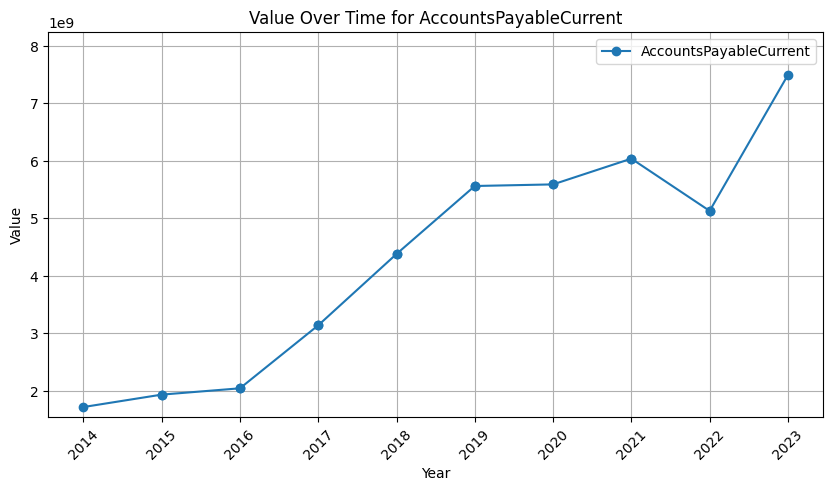

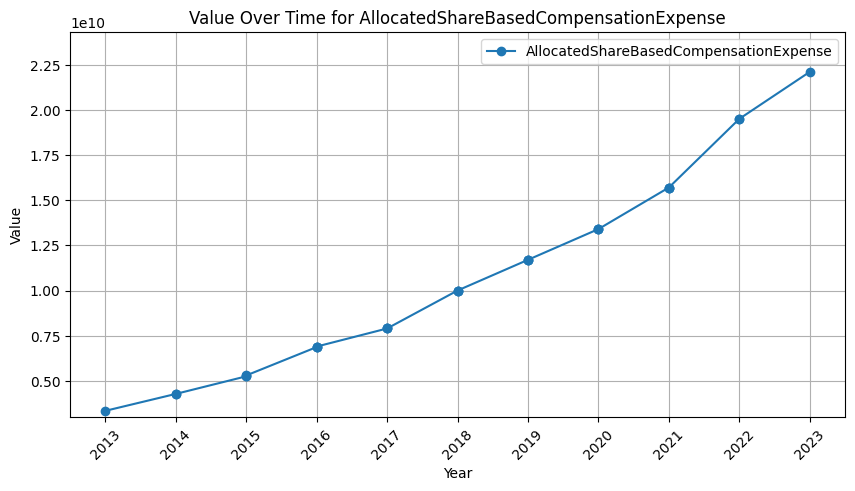

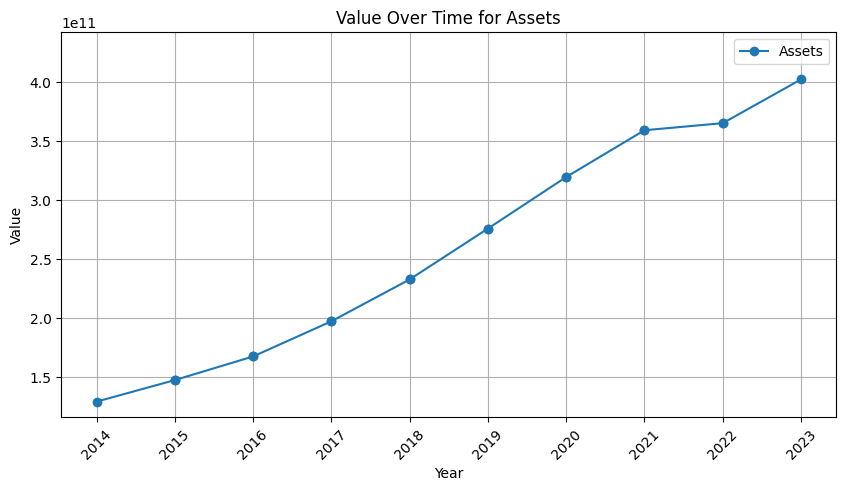

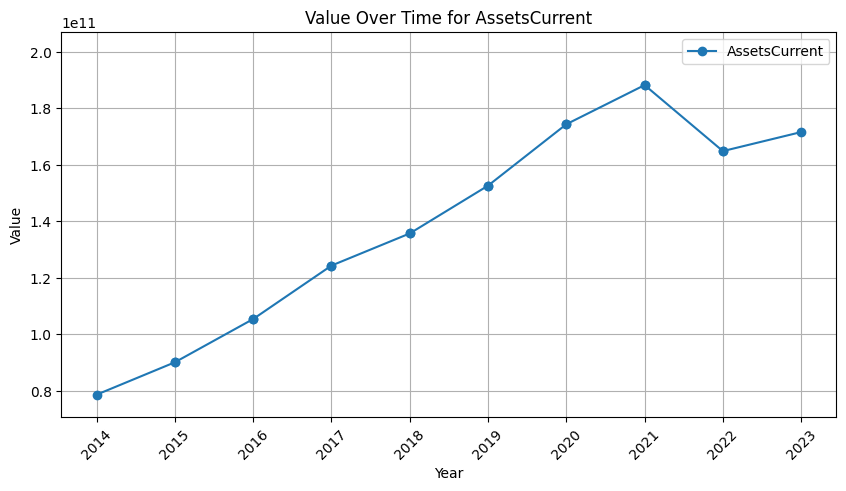

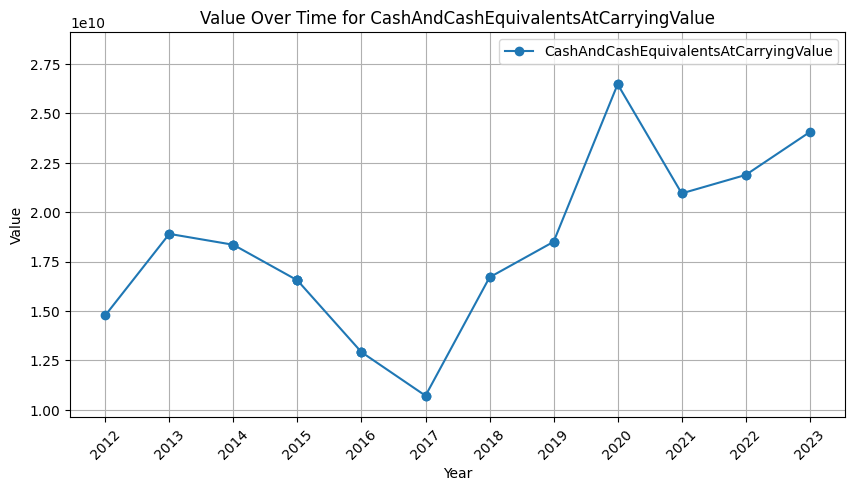

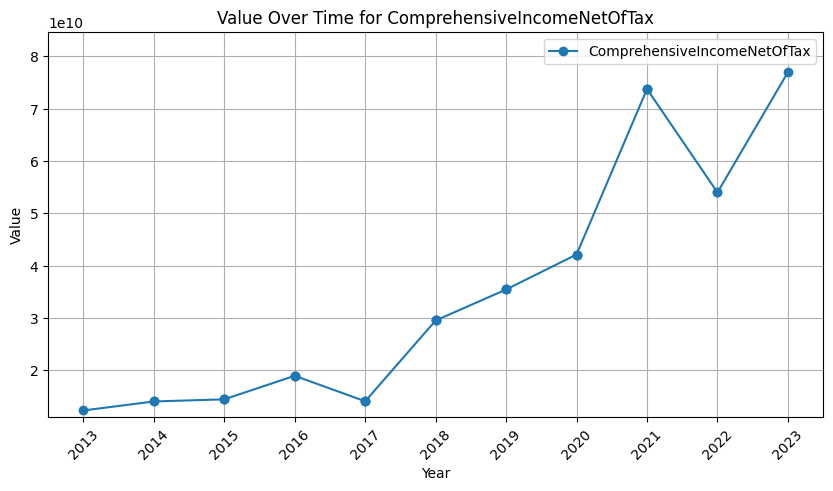

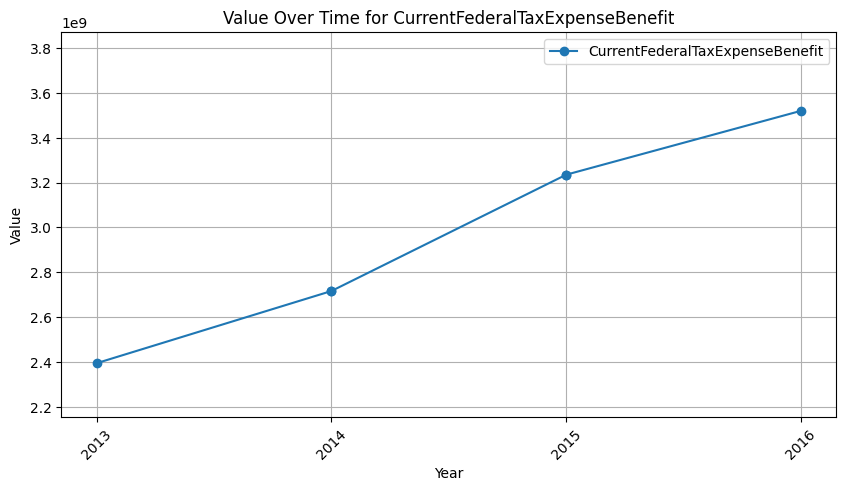

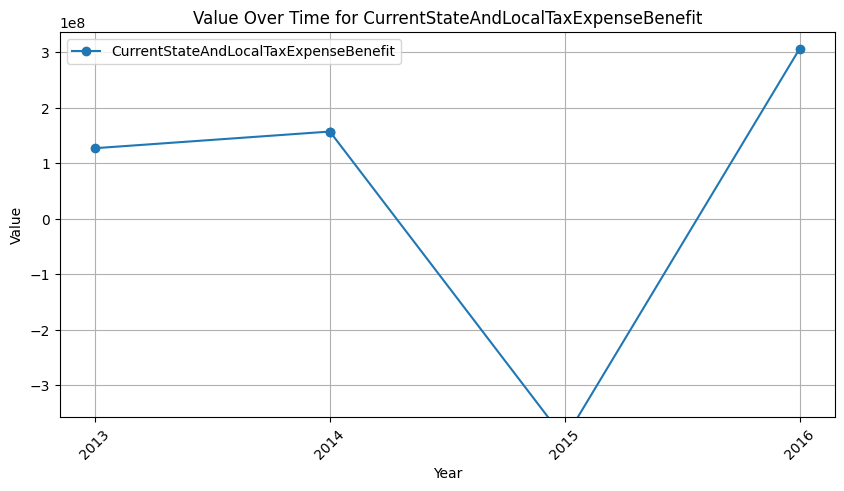

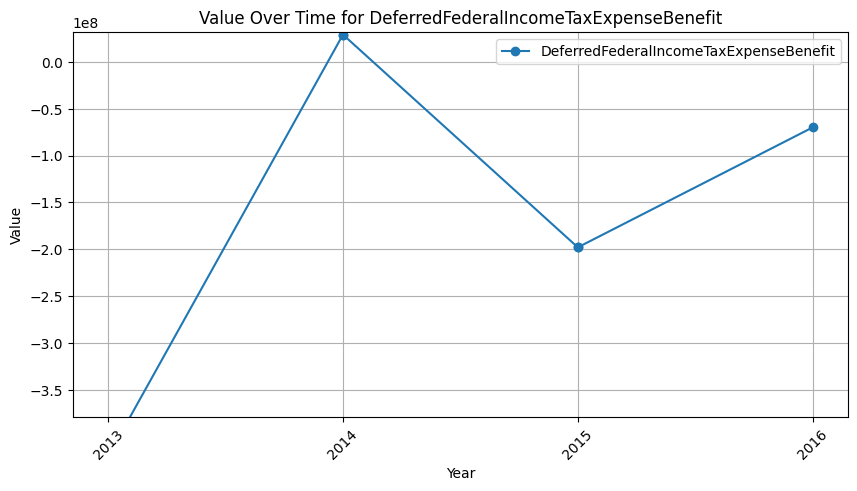

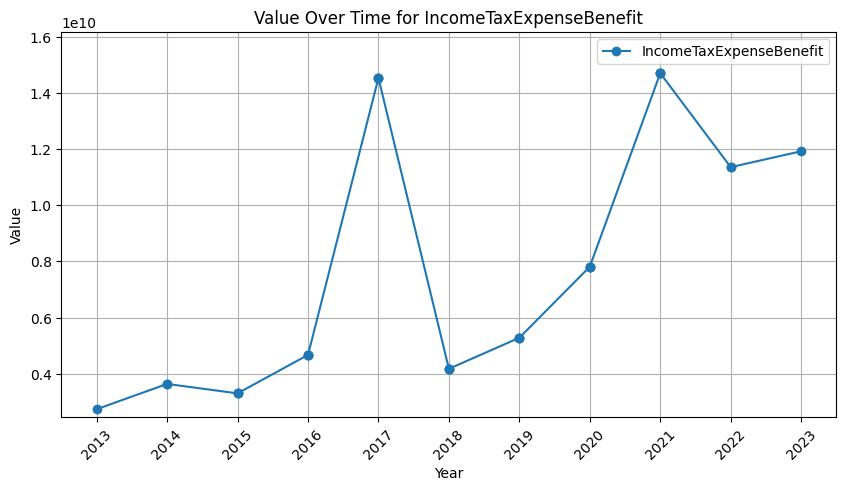

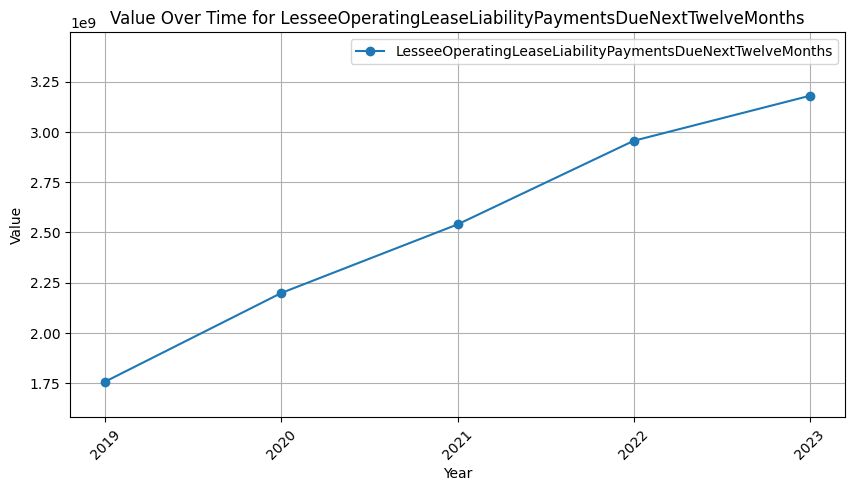

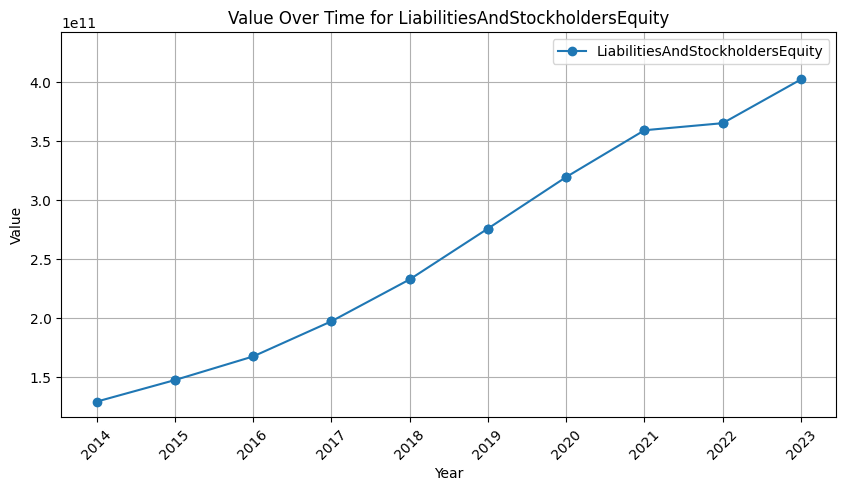

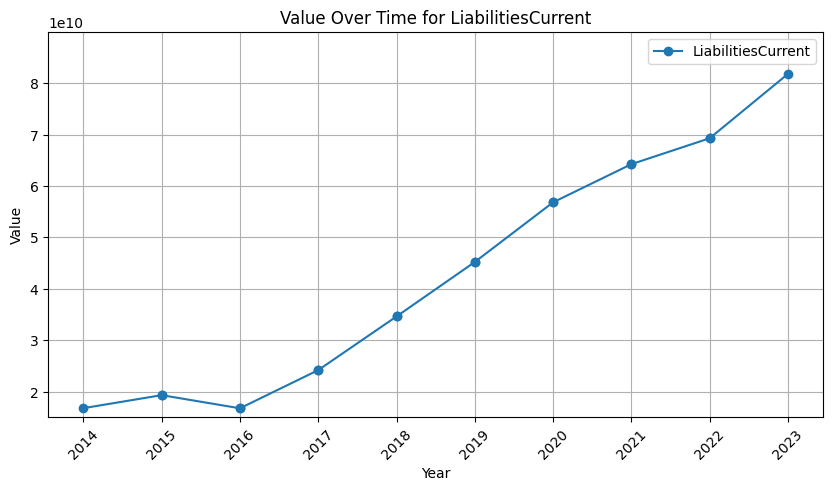

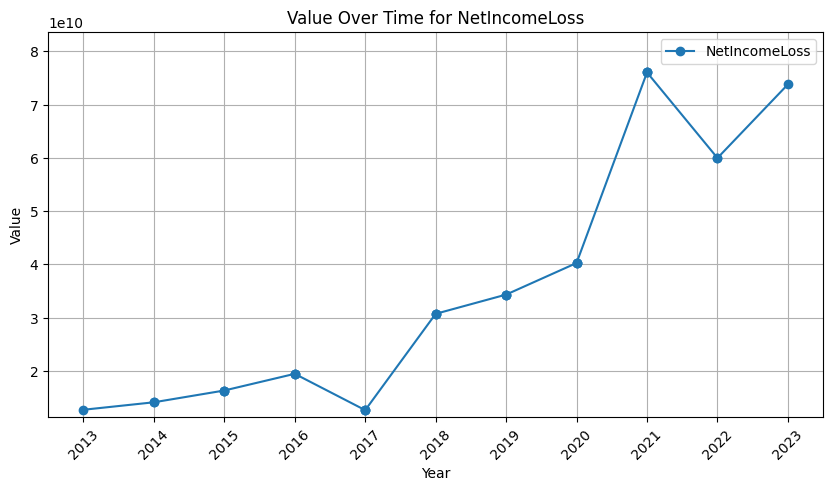

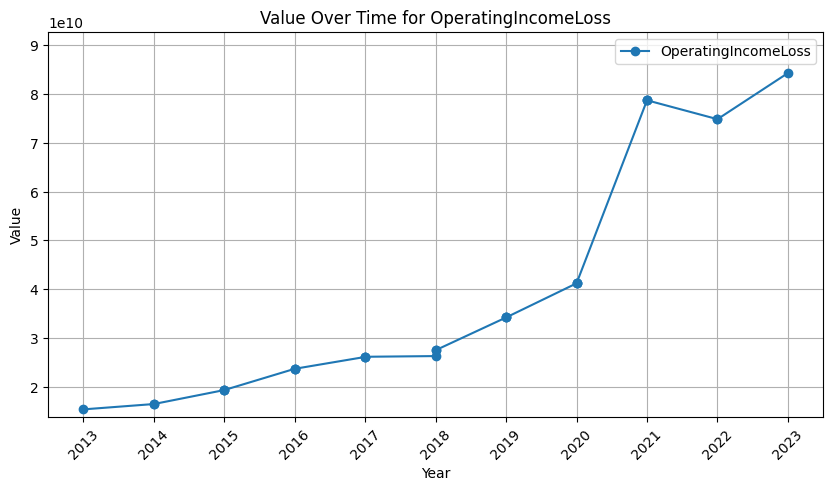

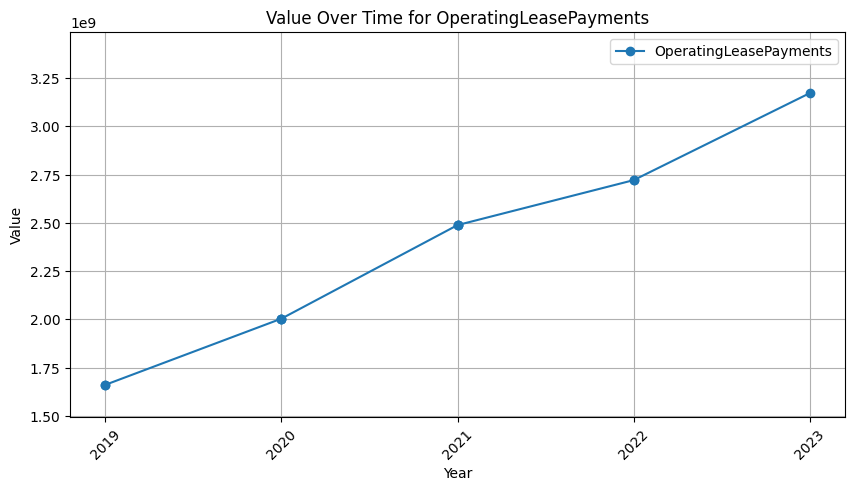

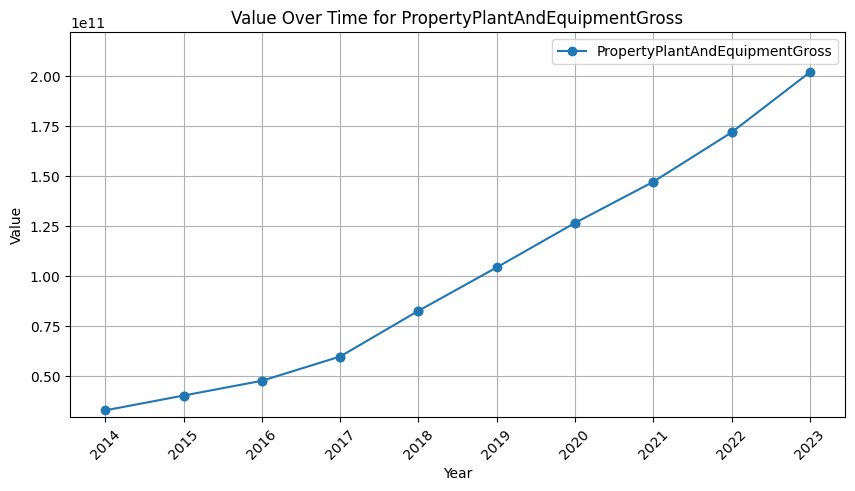

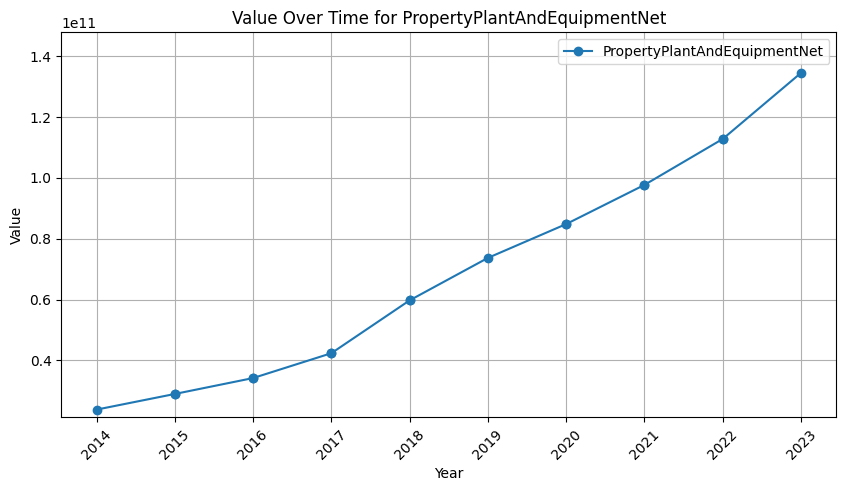

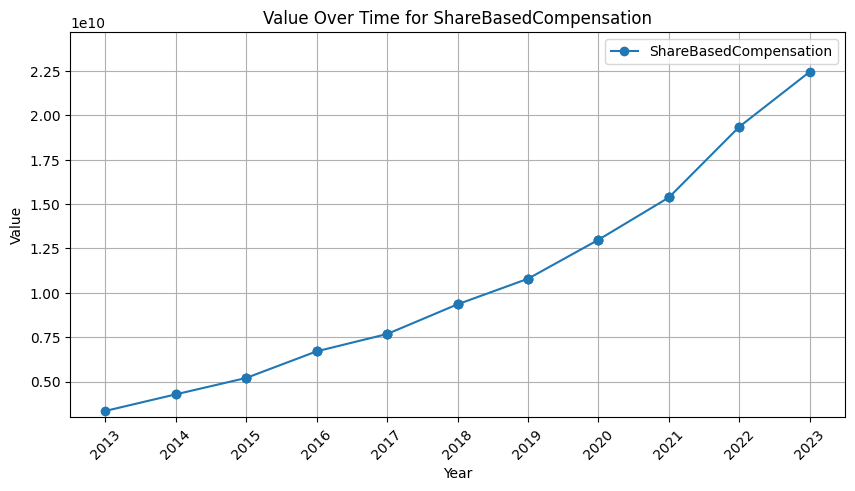

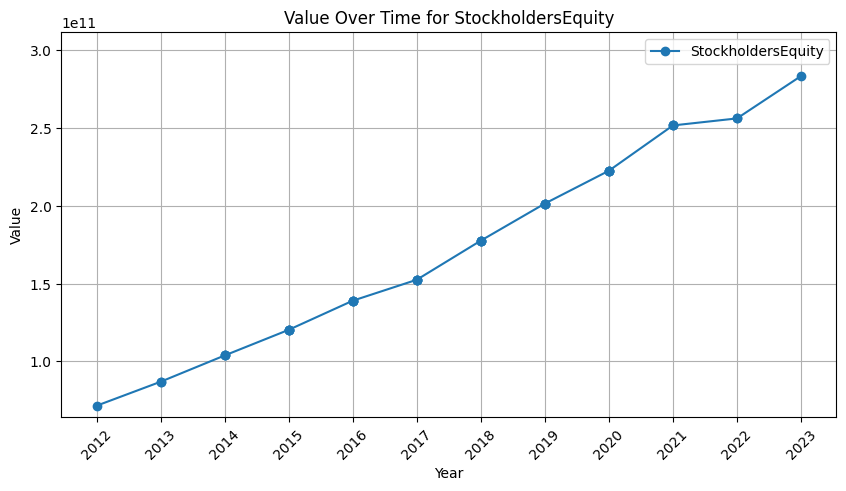

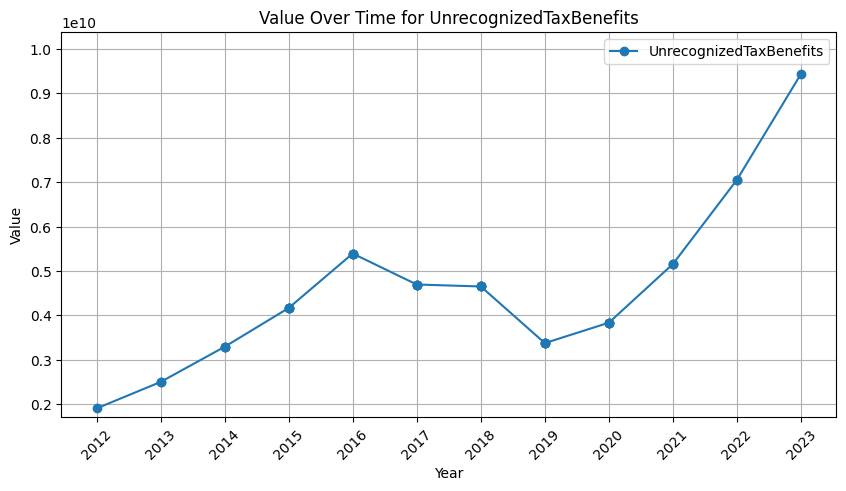

Label 'UnrecognizedTaxBenefits' not found in df_10k_by_label


In [47]:
import matplotlib.pyplot as plt
data_list = [
    "AccountsPayableCurrent",
    "AllocatedShareBasedCompensationExpense",
    "Assets",
    "AssetsCurrent",
    "CashAndCashEquivalentsAtCarryingValue",
    "ComprehensiveIncomeNetOfTax",
    "CurrentFederalTaxExpenseBenefit",
    "CurrentStateAndLocalTaxExpenseBenefit",
    "DeferredFederalIncomeTaxExpenseBenefit",
    "IncomeTaxExpenseBenefit",
    "LesseeOperatingLeaseLiabilityPaymentsDueNextTwelveMonths",
    "LiabilitiesAndStockholdersEquity",
    "LiabilitiesCurrent",
    "NetIncomeLoss",
    "OperatingIncomeLoss",
    "OperatingLeasePayments",
    "PropertyPlantAndEquipmentGross",
    "PropertyPlantAndEquipmentNet",
    "ShareBasedCompensation",
    "StockholdersEquity",
    "UnrecognizedTaxBenefits"
]

for label in data_list:
    group = df_10k_by_label[label]
    plt.figure(figsize=(10, 5))
    plt.plot(group['year'], group['val'], marker='o', label=label)
    plt.title(f'Value Over Time for {label}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.ylim(min(group['val']) * 0.9, max(group['val']) * 1.1)  # Set y-axis limits with some padding
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print(f"Label '{label}' not found in df_10k_by_label")